# 15 Кластеризация данных

## Генерация точек

In [48]:
from sklearn.cluster import KMeans
import numpy as np
from matplotlib import pylab as plt

import warnings
warnings.filterwarnings("ignore")

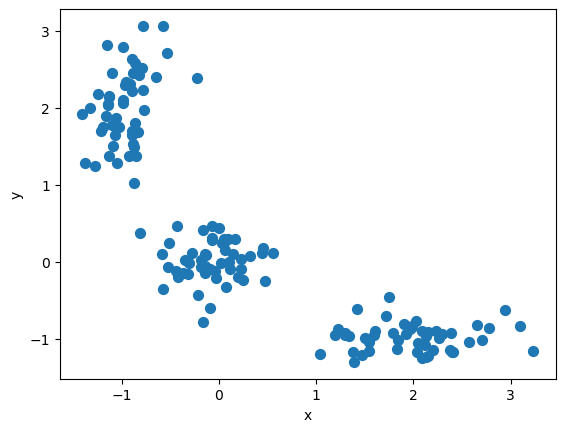

In [49]:
X = np.zeros((150, 2))

np.random.seed(seed=42)
X[:50, 0] = np.random.normal(loc=0.0, scale=.3, size=50)
X[:50, 1] = np.random.normal(loc=0.0, scale=.3, size=50)

X[50:100, 0] = np.random.normal(loc=2.0, scale=.5, size=50)
X[50:100, 1] = np.random.normal(loc=-1.0, scale=.2, size=50)

X[100:150, 0] = np.random.normal(loc=-1.0, scale=.2, size=50)
X[100:150, 1] = np.random.normal(loc=2.0, scale=.5, size=50)

plt.scatter(X[...,0], X[...,1], s=50, cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')
plt.show();

## kmeans кластеризация

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2
 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


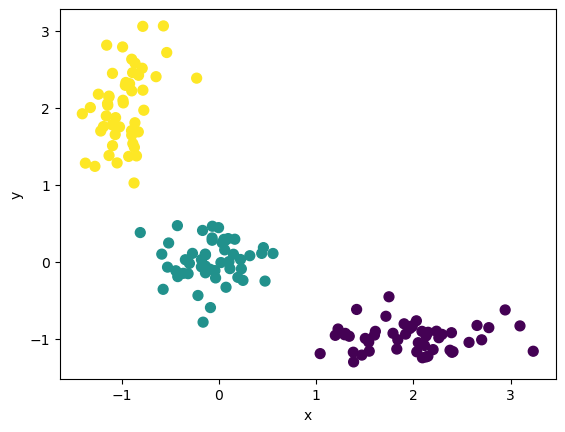

In [50]:
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(X)
print(kmeans.labels_) #список из номеров кластеров для каждого объекта обучающей выборки

plt.scatter(X[:,0], X[:,1], c = kmeans.labels_, s=50, cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')
plt.show();

## Иерархическая кластеризация

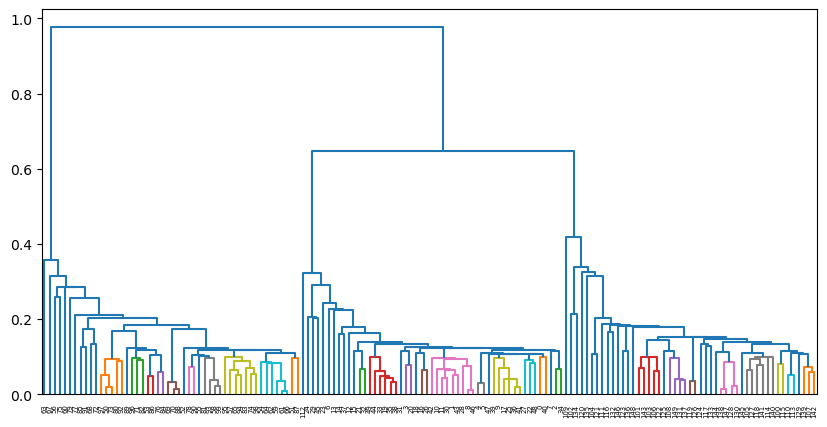

In [51]:
# from sclearn.cluster import AgglomerativeClustering

from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

distance_mat = pdist(X) # pdist посчитает нам верхний треугольник матрицы попарных расстояний

Z = hierarchy.linkage(distance_mat, 'single') # linkage — реализация агломеративного алгоритма
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, color_threshold=0.1)

Что произойдет, если подобрать неверное число кластеров?

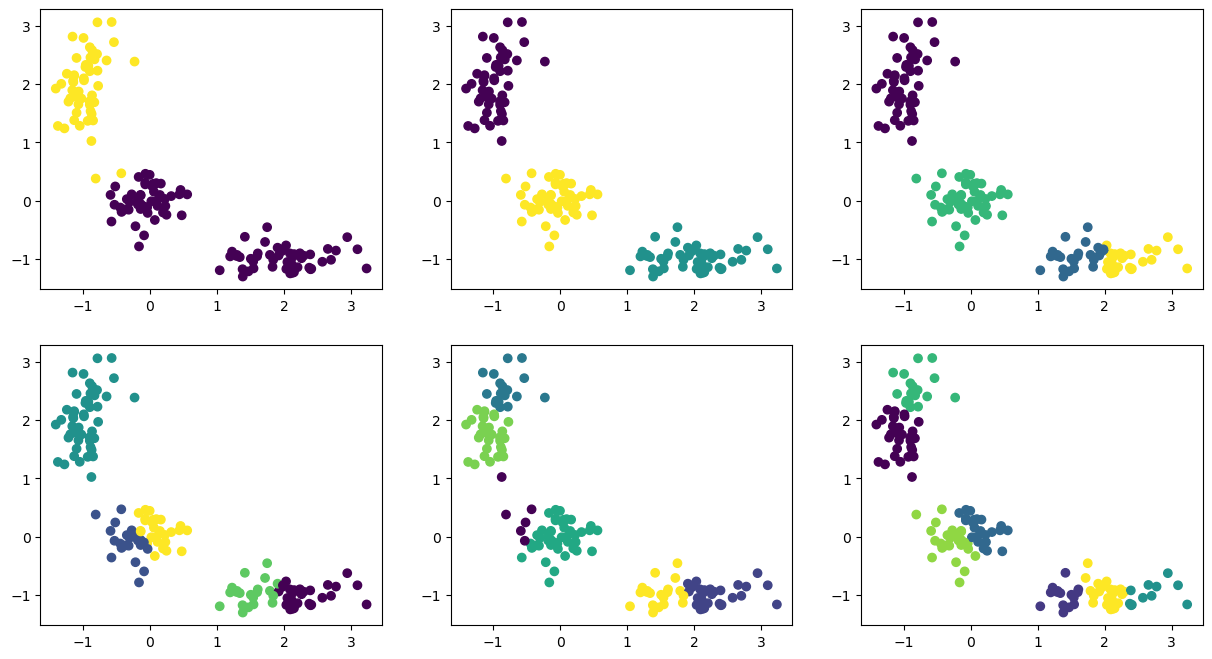

In [52]:
plt.figure(figsize= (15,8))
for n_c in range(2,8):
    kmeans = KMeans(n_clusters = n_c)
    kmeans = kmeans.fit(X)

    plt.subplot(2,3,n_c - 1)
    plt.scatter(X[:,0], X[:,1], c = kmeans.labels_)

plt.show()

## DBSCAN

(Density-based spatial clustering of applications with noise)

Это алгоритм, основанный на плотности — если дан набор объектов в некотором пространстве, алгоритм группирует вместе объекты, которые расположены близко и помечает как выбросы объекты, которые находятся в областях с малой плотностью (ближайшие соседи которых лежат далеко).

Посмотрим на результаты кластеризации при разном выборе параметров `eps` и `min_samples`.

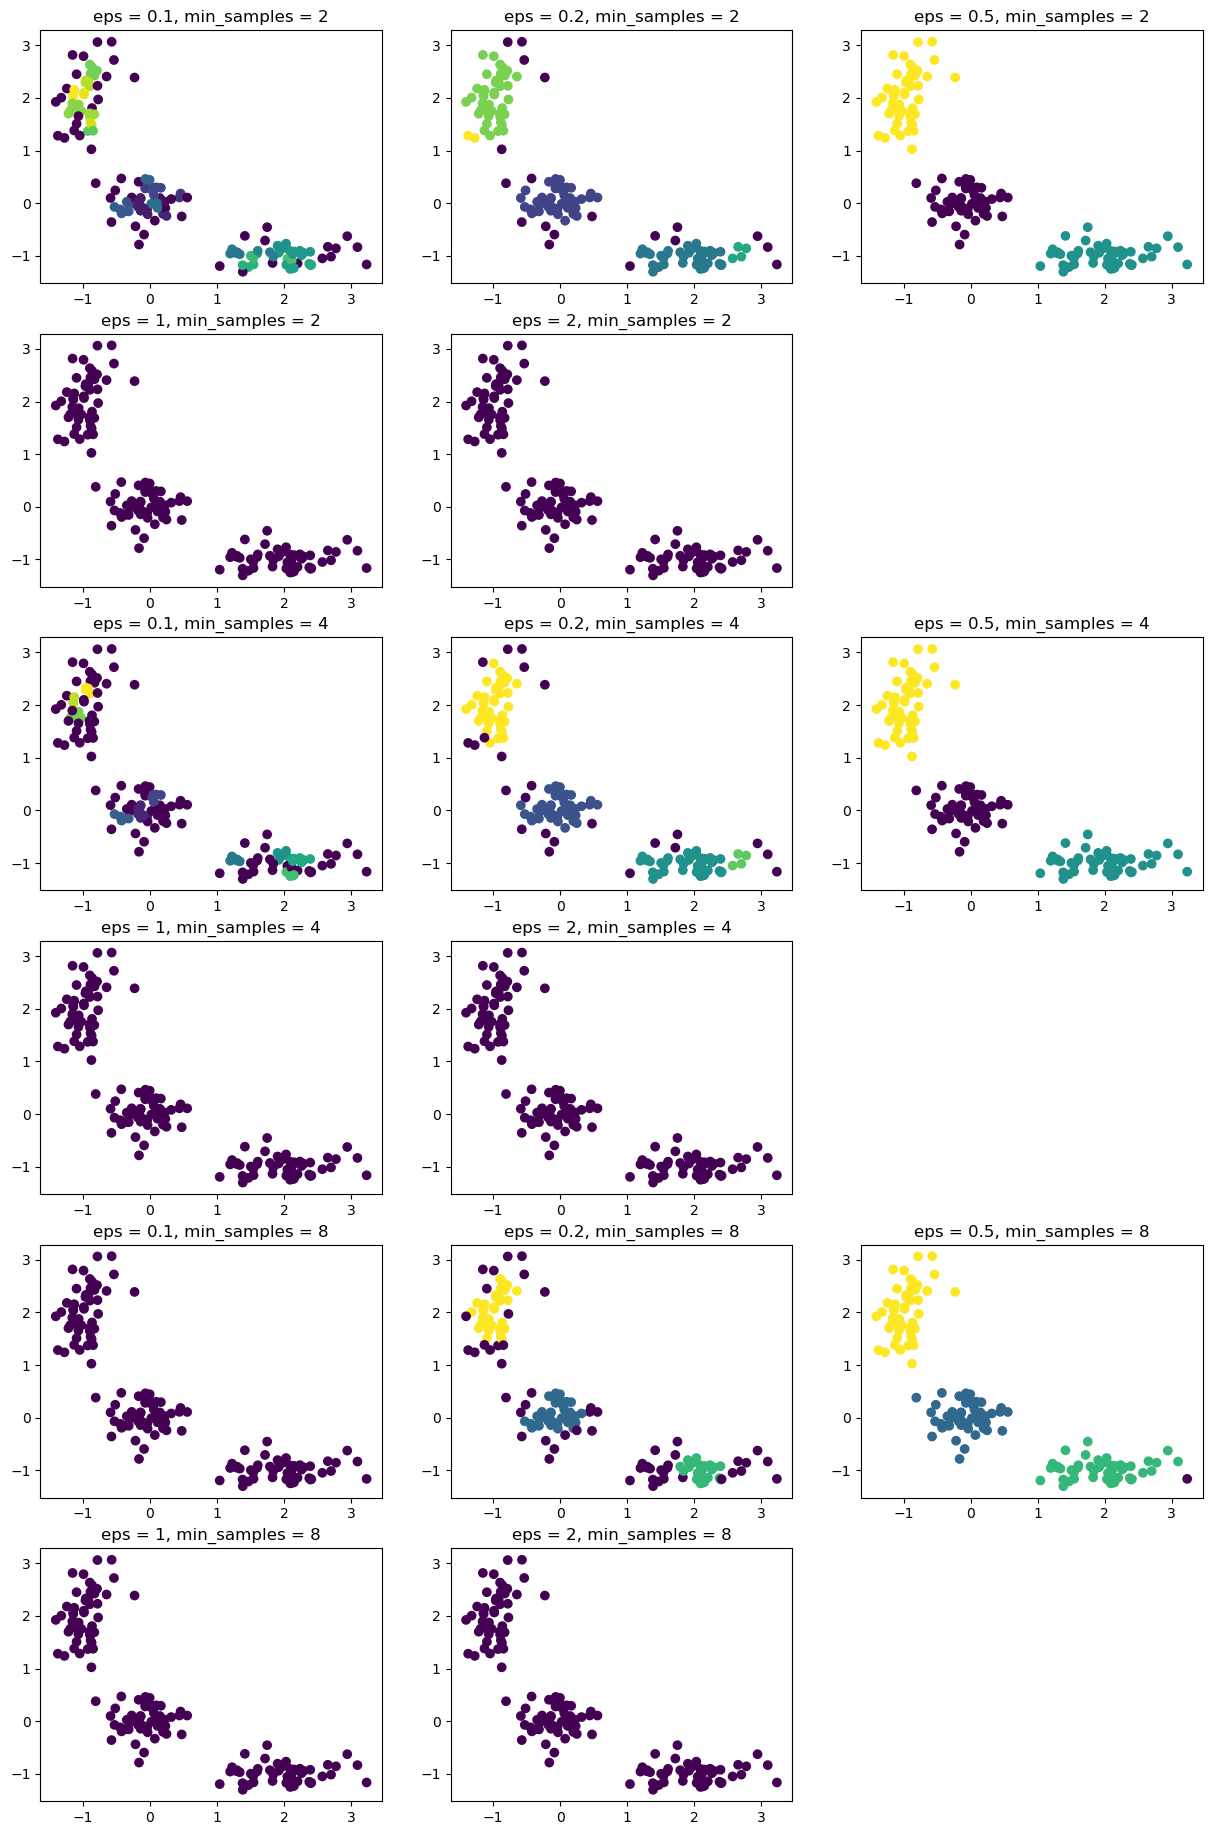

In [ ]:
from sklearn.cluster import DBSCAN

plt.figure(figsize= (15,23))
i = 1
for samples in [2, 4, 8]:
    for e in [0.1, 0.2, 0.5, 1, 2]:
        dbscan = DBSCAN(eps=e, min_samples=samples)
        clusters = dbscan.fit_predict(X)
        plt.subplot(6, 3, i)
        plt.scatter(X[:,0], X[:,1], c = clusters)
        plt.title('eps = {}, min_samples = {}'.format(e, samples))
        i += 1
    i += 1

plt.show();

# Спектральная кластеризация

In [54]:
from sklearn.datasets import make_circles
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

Сгенерируем датасет из трех концентрических окружностей

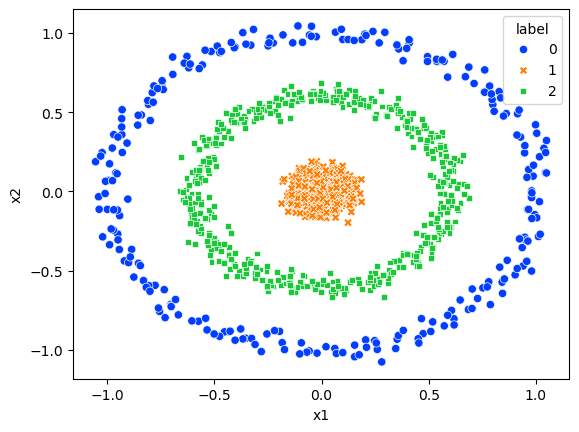

In [55]:
X_small, y_small = make_circles(n_samples=(250,500), random_state=3, noise=0.04, factor = 0.1)
X_large, y_large = make_circles(n_samples=(250,500), random_state=3, noise=0.04, factor = 0.6)
y_large[y_large==1] = 2

df = pd.DataFrame(np.vstack([X_small,X_large]),columns=['x1','x2'])
df['label'] = np.hstack([y_small,y_large])
df.label.value_counts()
sns.scatterplot(data=df,x='x1',y='x2',hue='label',style='label',palette="bright")
plt.show();

In [56]:
x1 = np.expand_dims(df['x1'].values, axis=1)
x2 = np.expand_dims(df['x2'].values, axis=1)
X = np.concatenate((x1,x2), axis=1)
y = df['label'].values

Применим K-Means

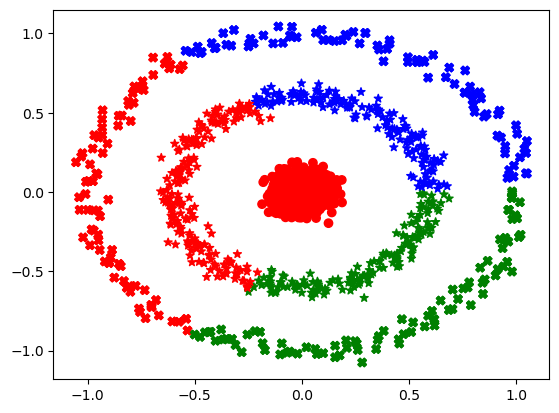

In [57]:
from sklearn.cluster import KMeans

clustering = KMeans(n_clusters = 3).fit(X)

colors = ['r','g','b']
colors = np.array([colors[label] for label in clustering.labels_])
plt.scatter(X[y==0, 0], X[y==0, 1], c=colors[y==0], marker='X')
plt.scatter(X[y==1, 0], X[y==1, 1], c=colors[y==1], marker='o')
plt.scatter(X[y==2, 0], X[y==2, 1], c=colors[y==2], marker='*')
plt.show();

Применим спектральную кластеризацию

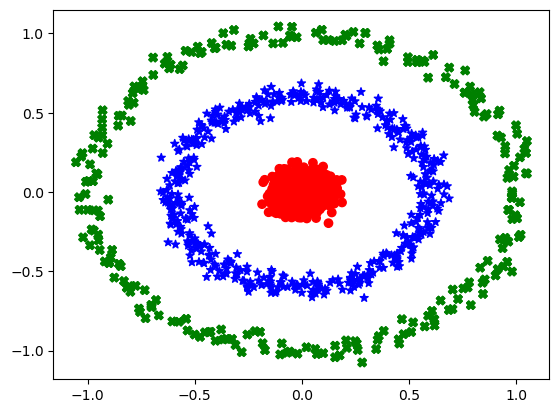

In [58]:
from sklearn.cluster import SpectralClustering

clustering = SpectralClustering(n_clusters=3, gamma=100).fit(X)

colors = ['r','g','b']
colors = np.array([colors[label] for label in clustering.labels_])
plt.scatter(X[y==0, 0], X[y==0, 1], c=colors[y==0], marker='X')
plt.scatter(X[y==1, 0], X[y==1, 1], c=colors[y==1], marker='o')
plt.scatter(X[y==2, 0], X[y==2, 1], c=colors[y==2], marker='*')
plt.show();

# Часть 1: K-Means
## Кластеризация исполнителей по жанрам

В этом задании вы попробуете кластеризовать исполнителей по жанрам на основе данных о прослушивании.

В матрице sample_matrix по строкам стоят пользователи, а по столбцам - исполнители.

Для каждой пары (пользователь,исполнитель) в таблице стоит число - доля (процент) прослушивания этого исполнителя выбранным пользователем.

## Импорт библиотек, загрузка данных

In [180]:
import pandas as pd

In [181]:
ratings = pd.read_excel("data/sample_matrix.xlsx", engine='openpyxl')

In [182]:
ratings.head()

,user,the beatles,radiohead,deathcab for cutie,coldplay,modest mouse,sufjan stevens,dylan. bob,red hot clili peppers,pink fluid,...,municipal waste,townes van zandt,curtis mayfield,jewel,lamb,michal w. smith,群星,agalloch,meshuggah,yellowcard
0,0,NaN,0.020417,NaN,NaN,NaN,NaN,NaN,0.030496,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,0.184962,0.024561,NaN,NaN,0.136341,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,0.028635,NaN,NaN,NaN,0.024559,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0.043529,0.086281,0.034590,0.016712,0.015935,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Задание

Транспонируем матрицу ratings, чтобы по строкам стояли исполнители.

In [183]:
ratings = ratings.T
ratings.shape

(1001, 5000)

Выкиньте строку под названием `user`.

In [184]:
# ваш код здесь
ratings = ratings.drop('user', axis=0)
ratings.shape

(1000, 5000)

## Вопрос для Quiz

Сколько строк осталось в матрице ratings?

Заполните пропуски нулями.

In [185]:
# ваш код здесь
ratings = ratings.fillna(0)
ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
the beatles,0.000000,0.000000,0.000000,0.0,0.043529,0.000000,0.0,0.0,0.093398,0.017621,...,0.000000,0.0,0.121169,0.038168,0.007939,0.017884,0.0,0.076923,0.0,0.000000
radiohead,0.020417,0.184962,0.000000,0.0,0.086281,0.006322,0.0,0.0,0.000000,0.019156,...,0.017735,0.0,0.000000,0.000000,0.011187,0.000000,0.0,0.000000,0.0,0.000000
deathcab for cutie,0.000000,0.024561,0.028635,0.0,0.034590,0.000000,0.0,0.0,0.000000,0.013349,...,0.121344,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.027893
coldplay,0.000000,0.000000,0.000000,0.0,0.016712,0.000000,0.0,0.0,0.000000,0.000000,...,0.217175,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
modest mouse,0.000000,0.000000,0.000000,0.0,0.015935,0.000000,0.0,0.0,0.000000,0.030437,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000


Нормализуйте данные при помощи `normalize`.

In [186]:
from sklearn.preprocessing import normalize

# ваш код здесь

ratings_norm = normalize(ratings)
ratings_norm = pd.DataFrame(ratings_norm, columns=ratings.columns, index=ratings.index)
ratings_norm

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
the beatles,0.000000,0.000000,0.000000,0.0,0.012054,0.000000,0.0,0.0,0.025864,0.004880,...,0.000000,0.0,0.033554,0.010569,0.002199,0.004952,0.0,0.021302,0.0,0.000000
radiohead,0.009348,0.084688,0.000000,0.0,0.039505,0.002894,0.0,0.0,0.000000,0.008771,...,0.008120,0.0,0.000000,0.000000,0.005122,0.000000,0.0,0.000000,0.0,0.000000
deathcab for cutie,0.000000,0.017278,0.020144,0.0,0.024333,0.000000,0.0,0.0,0.000000,0.009391,...,0.085361,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.019622
coldplay,0.000000,0.000000,0.000000,0.0,0.011129,0.000000,0.0,0.0,0.000000,0.000000,...,0.144628,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
modest mouse,0.000000,0.000000,0.000000,0.0,0.010260,0.000000,0.0,0.0,0.000000,0.019597,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
michal w. smith,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
群星,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
agalloch,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
meshuggah,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000


Примените KMeans с 5ю кластерами на преобразованной матрице (сделайте fit, а затем вычислите кластеры при помощи predict).

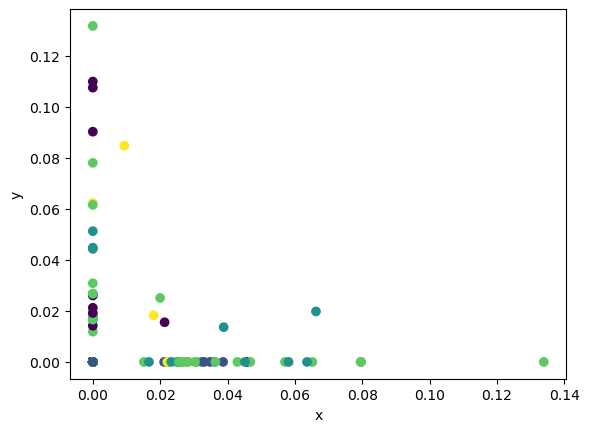

In [187]:
from sklearn.cluster import KMeans

# ваш код здесь

kmeans = KMeans(n_clusters=5)
kmeans.fit(ratings_norm)

plt.scatter(ratings_norm.values[:,0], ratings_norm.values[:,1], c = kmeans.labels_, cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')
plt.show();

Выведите на экран центры кластеров (центроиды)

In [188]:
# ваш код здесь

centroids = kmeans.cluster_centers_
centroids

array([[3.42333096e-04, 2.14667699e-03, 5.11062309e-03, ...,
        2.20902280e-03, 2.16840434e-19, 4.55331939e-03],
       [1.01335431e-03, 0.00000000e+00, 1.32352521e-03, ...,
        2.94976258e-03, 8.46623358e-04, 1.72290536e-03],
       [2.54893646e-03, 1.36325543e-03, 6.02518090e-05, ...,
        2.16840434e-19, 4.09146817e-04, 2.08385469e-04],
       [2.35592937e-03, 1.11530676e-03, 5.00365521e-04, ...,
        2.80360586e-03, 1.80837772e-03, 5.25601061e-04],
       [4.99841083e-04, 1.03253089e-03, 6.13866419e-04, ...,
        2.16840434e-19, 3.96587785e-03, 3.55057917e-03]])

Для каждого кластера найдем топ-10 исполнителей, наиболее близких к центроидам соотвествующего кластера.

Схожесть исполнителей будем считать по косинусной мере (spatial.distance.cosine).

## Quiz

Вычислите расстояние между "the beatles" и "coldplay". Ответ округлите до сотых.


In [189]:
ratings_norm

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
the beatles,0.000000,0.000000,0.000000,0.0,0.012054,0.000000,0.0,0.0,0.025864,0.004880,...,0.000000,0.0,0.033554,0.010569,0.002199,0.004952,0.0,0.021302,0.0,0.000000
radiohead,0.009348,0.084688,0.000000,0.0,0.039505,0.002894,0.0,0.0,0.000000,0.008771,...,0.008120,0.0,0.000000,0.000000,0.005122,0.000000,0.0,0.000000,0.0,0.000000
deathcab for cutie,0.000000,0.017278,0.020144,0.0,0.024333,0.000000,0.0,0.0,0.000000,0.009391,...,0.085361,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.019622
coldplay,0.000000,0.000000,0.000000,0.0,0.011129,0.000000,0.0,0.0,0.000000,0.000000,...,0.144628,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
modest mouse,0.000000,0.000000,0.000000,0.0,0.010260,0.000000,0.0,0.0,0.000000,0.019597,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
michal w. smith,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
群星,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
agalloch,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
meshuggah,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000


In [190]:
from scipy import spatial

# ваш код здесь
spatial.distance.cosine(ratings_norm.loc['the beatles'], ratings_norm.loc['coldplay'])

0.8955669648278295

Ниже для вашего удобства написана функция, принимающая на вход:
* np.array points - все точки кластера
* pt - центроид кластера
* K = 10 - число
Функция возвращает K индексов объектов (строк в массиве points), ближайших к центроиду.

In [191]:
def pClosest(points, pt, K=10):
    # Вычисляем косинусное расстояние между рейтингом исполнителя и центройдом
    distances = []
    for i, point in enumerate(points):
        distance = spatial.distance.cosine(point, pt)
        distances.append((i, distance))
    
    # Сортируем индексы точек по этим расстояниям
    sorted_indices = []
    for item in sorted(distances, key=lambda x: x[1]):
        sorted_indices.append(item[0])
    
    # Возвращаем первые K индексов, которые соответствуют ближайшим точкам
    return sorted_indices[:K]

# Список названий исполнителей, соответствующих каждой точке
artists = ratings_norm.index

# Список центройдов для каждого кластера
centroids = kmeans.cluster_centers_

# пройдем по центройдам каждого кластера по циклу
for cluster_id, centroid in enumerate(centroids):
    
    
    # Найдем индексы ближайших исполнителей к центройду кластера
    closest_indices = pClosest(ratings_norm.values, centroid)
    
    # Найдем имена исполнителей для полученных 10 исполнителей
    closest_artists = [artists[idx] for idx in closest_indices]
    
    # Выведем на печать
    print(f"Кластер {cluster_id}:")
    print("Топ-10 ближайших исполнителей:")
    for rank, artist in enumerate(closest_artists):
        print(f"{rank + 1}. {artist}")
    print('-'*100)

Кластер 0:
Топ-10 ближайших исполнителей:
1. the shins
2. sufjan stevens
3. deathcab for cutie
4. belle and sebastian
5. the arcade fire
6. spoon
7. radiohead
8. the decemberists
9. the beatles
10. ironand wine
----------------------------------------------------------------------------------------------------
Кластер 1:
Топ-10 ближайших исполнителей:
1. fall out boy
2. paramore
3. cartel
4. dashboard confesssional
5. the all-americian rejects
6. taking back sunday
7. anberlin
8. brand new
9. saosin
10. blink-182
----------------------------------------------------------------------------------------------------
Кластер 2:
Топ-10 ближайших исполнителей:
1. nas
2. a tribe called quest
3. jay-z
4. the roots featuring d'angelo
5. kanye west
6. mos def
7. lupe the gorilla
8. de la soul
9. gangstarr
10. little brother
----------------------------------------------------------------------------------------------------
Кластер 3:
Топ-10 ближайших исполнителей:
1. metallica
2. system of a down

Примените функцию pClosest (или придумайте свой подход) и выведите для каждого кластера названия топ-10 исполнителей, ближайших к центроиду.

In [192]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
ratings_norm_pca = pca.fit_transform(ratings_norm)

In [193]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(ratings_norm_pca)
y_kmeans = kmeans.predict(ratings_norm_pca)

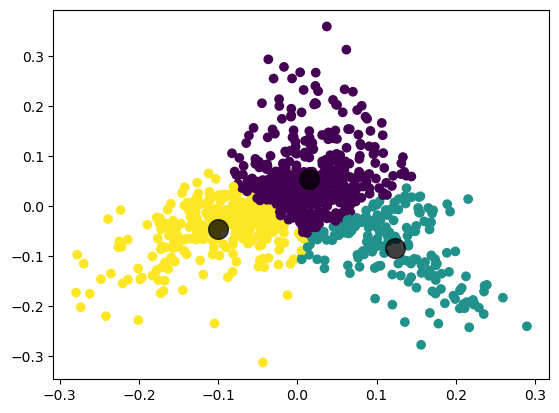

In [194]:
plt.scatter(ratings_norm_pca[:, 0], ratings_norm_pca[:, 1], c=y_kmeans, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.75)
plt.show();

## Quiz

Проинтерпретируйте результат. Что можно сказать о смысле кластеров?

# Часть 2: сравнение алгоритмов кластеризации

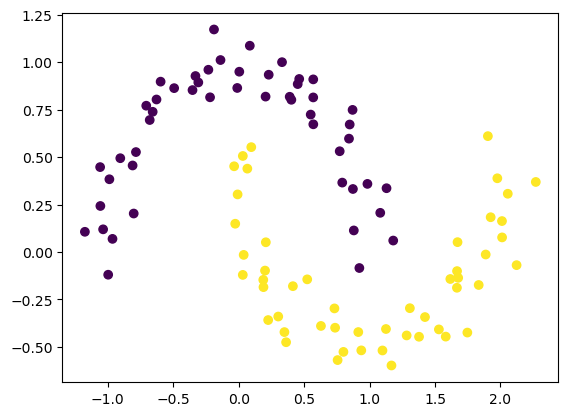

In [195]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_moons

data = make_moons(n_samples=100, noise=0.1, random_state=42)

X = data[0]
y = data[1]

plt.scatter(X[:,0], X[:,1], c=y)
plt.show();

Далее вы попробуете разные кластеризации для поиска кластеров. Также замеряйте время работы каждого метода.

Попробуйте найти кластеры при помощи KMeans

[1 0 1 0 0 0 0 1 1 1 0 0 1 0 1 1 1 1 0 0 0 1 0 0 1 0 0 1 1 1 1 0 1 0 1 1 1
 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 1 0 0 0
 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0 1 0 1 0]


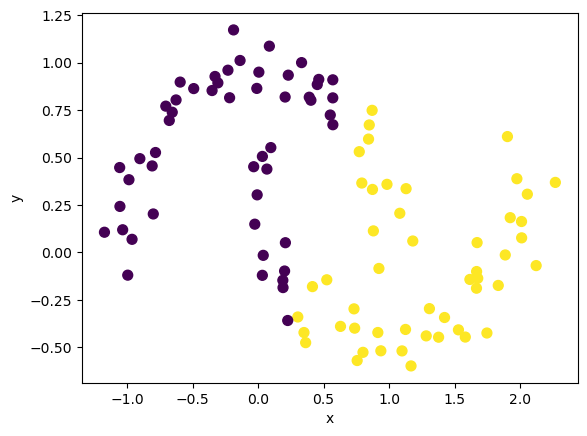

In [196]:
# ваш код здесь
kmeans = KMeans(n_clusters=2, random_state=42)
preds = kmeans.fit_predict(X, y)
print(preds)

plt.scatter(X[:,0], X[:,1], c = preds, s=50, cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')
plt.show();

## Quiz

Подберите $\varepsilon$ и min_samples в DBSCAN, чтобы наилучшим образом найти кластеры.
Ищите гиперпараметры из диапазонов:
* eps in [0.05, 0.1, 0.2, 0.28, 0.3, 0.32]
* min_samples in [4, 5, 6, 7]

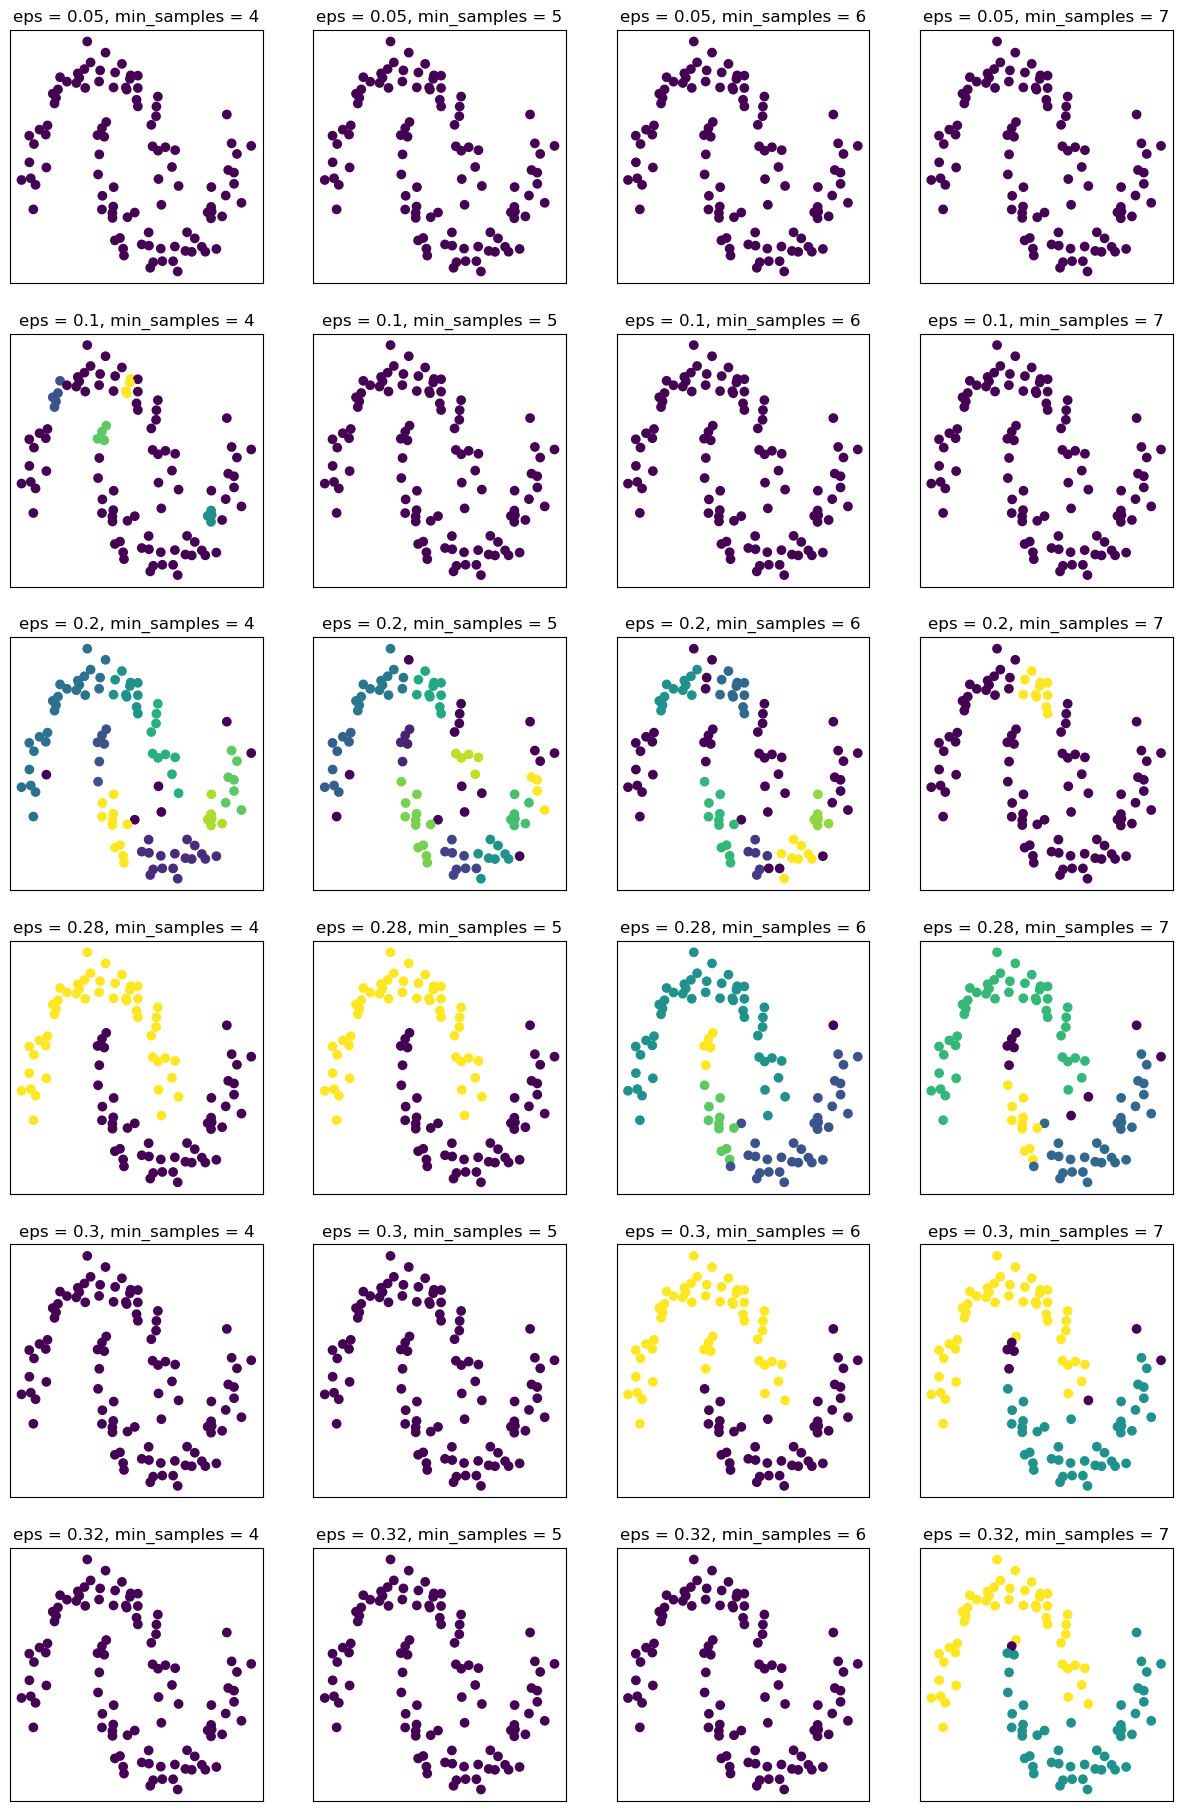

In [197]:
# ваш код здесь
min_samples = [4, 5, 6, 7]
eps = [0.05, 0.1, 0.2, 0.28, 0.3, 0.32]

fig, ax = plt.subplots(len(eps), len(min_samples),  figsize=(15,23))
for j, samples in enumerate(min_samples):
    for i, e in enumerate(eps):
        dbscan = DBSCAN(eps=e, min_samples=samples)
        clusters = dbscan.fit_predict(X)
        ax[i][j].set_title('eps = {}, min_samples = {}'.format(e, samples))
        ax[i][j].scatter(X[:,0], X[:,1], c = clusters)
        ax[i][j].set_xticks([])
        ax[i][j].set_yticks([])

plt.show();

## Quiz

Используйте иерархическую кластеризацию для поиска кластеров.
Задайте в методе 2 кластера. Подберите гиперпараметр linkage из списка ['ward', 'complete', 'average', 'single'], дающий наилучший результат.

In [198]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# ваш код здесь

# Инициализируем лучшую оценку силуэта
best_silhoutte = -1
best_linkage = ''

for linkage in ['ward', 'complete', 'average', 'single']:
    # Создаем экземпляр кластеризатра с текущим методом связывания
    agglomerative = AgglomerativeClustering(n_clusters=2, linkage=linkage)

    # Прогнозируем кластеры
    preds = agglomerative.fit_predict(X)
    
    # Вычисляем силуэтный коэффициент
    silhoutte = silhouette_score(X, preds)

    if silhoutte > best_silhoutte:
        best_silhoutte = silhoutte
        best_linkage = linkage

print(best_linkage, best_silhoutte)

complete 0.4676584228146433


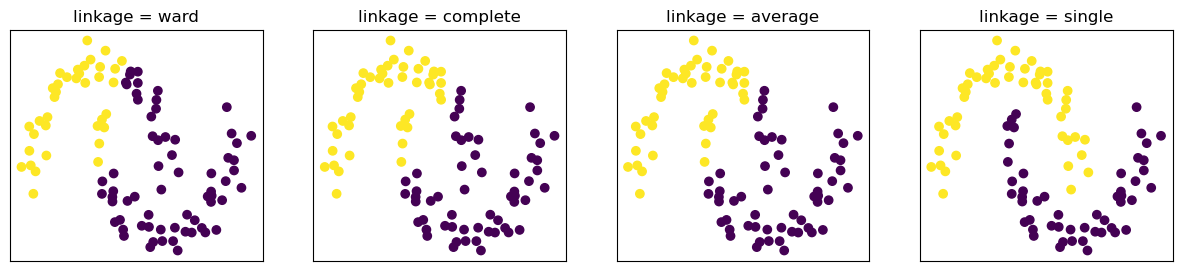

In [ ]:
from sklearn.cluster import AgglomerativeClustering

linkages = ['ward', 'complete', 'average', 'single']

fig, ax = plt.subplots(1, len(linkages),  figsize=(15,3))
for i, linkage in enumerate(linkages):
    agglomerative = AgglomerativeClustering(n_clusters=2, linkage=linkage)
    clusters = agglomerative.fit_predict(X)
    ax[i].set_title('linkage = {}'.format(linkage))
    ax[i].scatter(X[:,0], X[:,1], c = clusters)
    ax[i].set_xticks([])
    ax[i].set_yticks([])

plt.show();

Что произойдет, если подобрать неверное число кластеров?

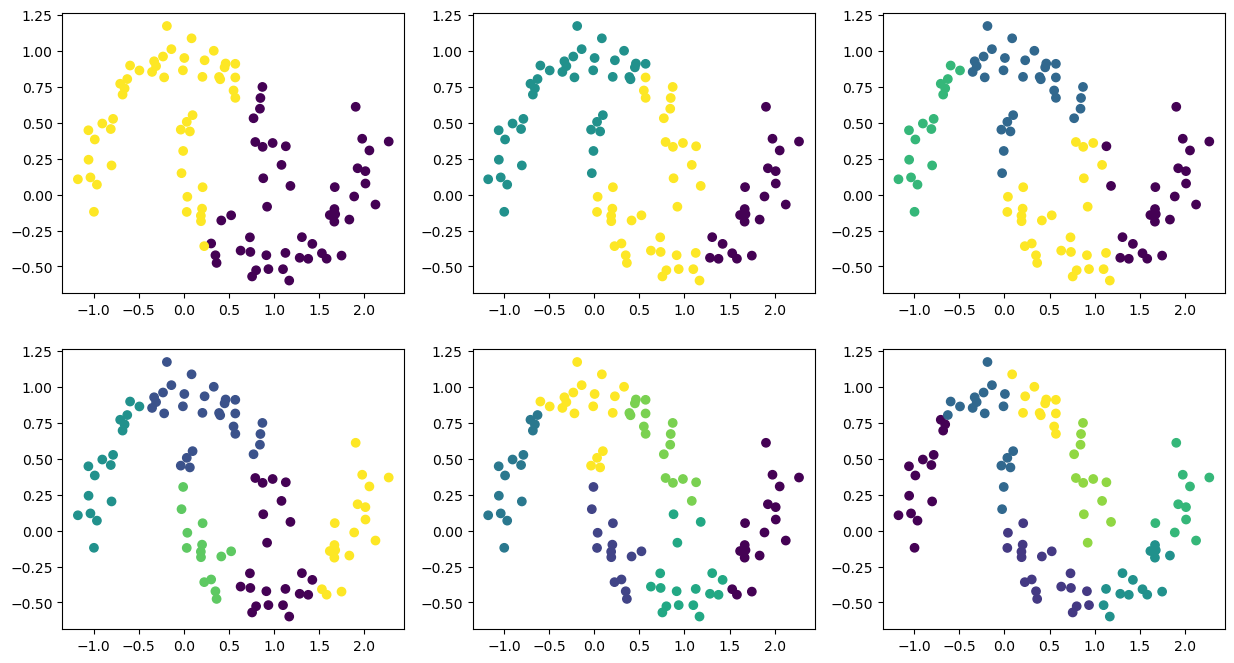

In [200]:
plt.figure(figsize= (15,8))
for n_c in range(2,8):
    kmeans = KMeans(n_clusters = n_c)
    kmeans = kmeans.fit(X)

    plt.subplot(2,3,n_c - 1)
    plt.scatter(X[:,0], X[:,1], c = kmeans.labels_)

plt.show()

## Quiz

Попробуйте найти кластеры при помощи спектральной кластеризации.
Задайте 2 кластера, affinity='nearest_neighbors', random_state=42. Подберите гиперпараметр n_neighbors из диапазона [1,2,...,19], чтобы добиться наилучшего результата.

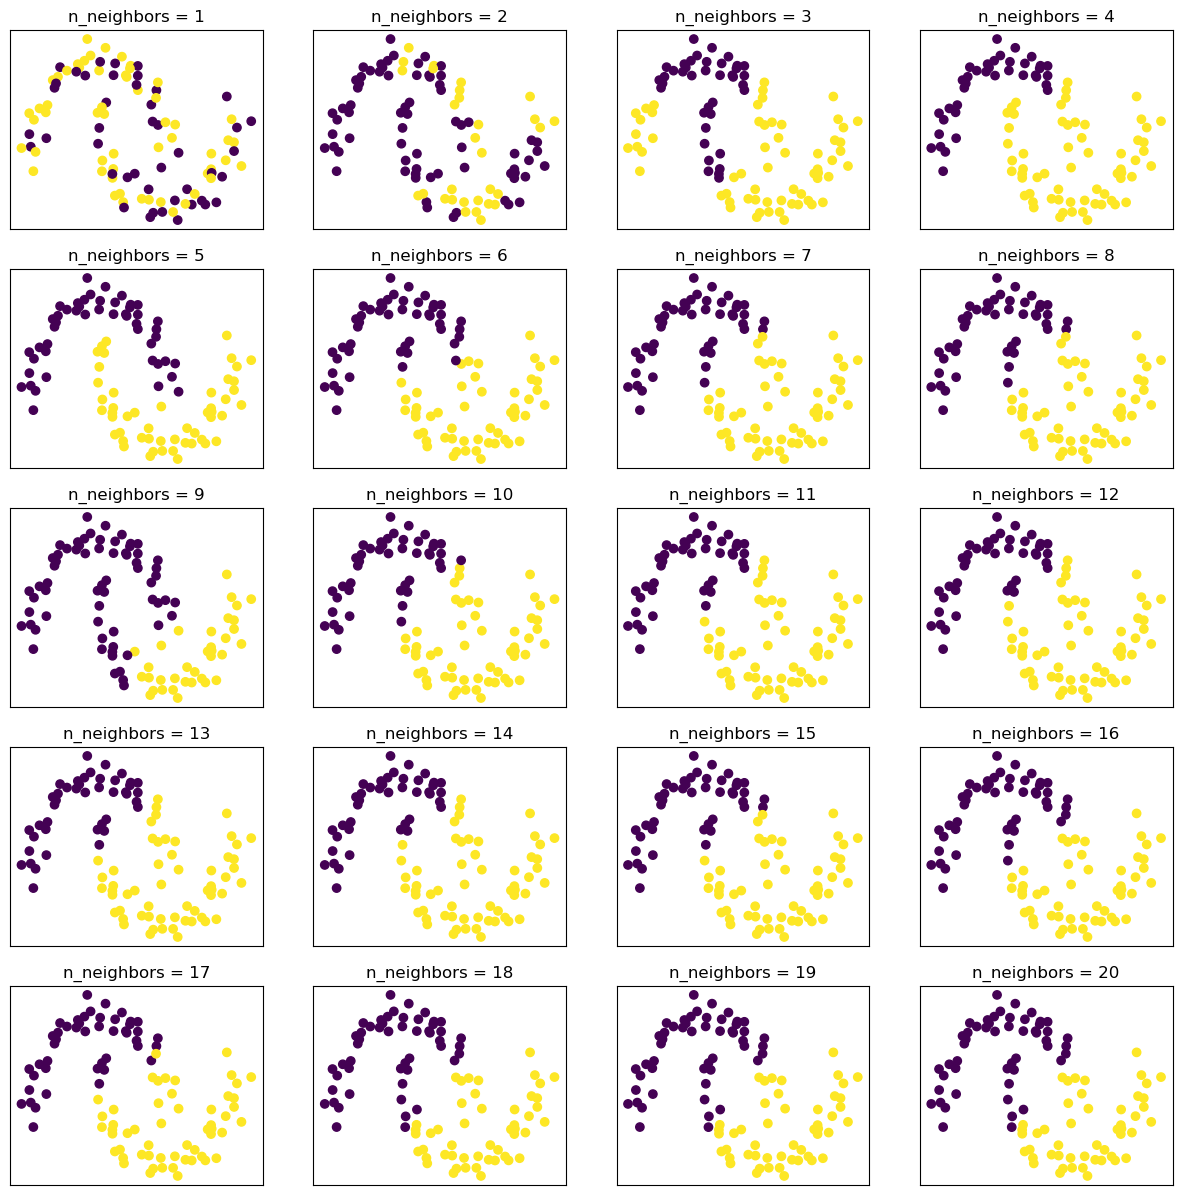

In [214]:

# ваш код здесь
from sklearn.cluster import SpectralClustering

n_neighbors_list = 20

fig, ax = plt.subplots(int(np.ceil(n_neighbors_list / 4)), 4,  figsize=(15,15))
for i, n_neighbors in enumerate(range(1, n_neighbors_list + 1)):
    row = i // 4
    col = i % 4
    spectcluster = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', 
                                     random_state=42, n_neighbors=n_neighbors)
    clusters = spectcluster.fit_predict(X)
    
    ax[row, col].set_title('n_neighbors = {}'.format(n_neighbors))
    ax[row, col].scatter(X[:,0], X[:,1], c = clusters)
    ax[row, col].set_xticks([])
    ax[row, col].set_yticks([])

plt.show();

## Quiz

Сделайте выводы: какой метод сработал лучше других? какой метод сработал быстрее? есть ли метод, наилучший и по качеству, и по времени одновременно?